In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode(dropna=False).iloc[0])

In [12]:
df_categorial = [c for c in df.columns if df[c].dtype.name == 'object']
df_categorial

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
df_encoded = pd.get_dummies(df[df_categorial])
df_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


<Axes: >

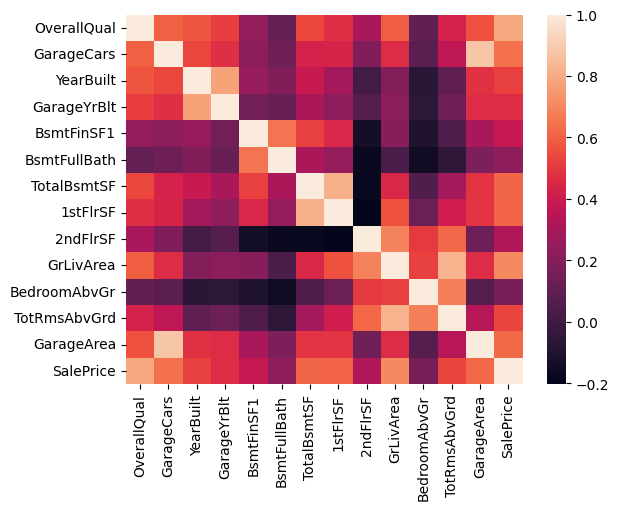

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

filtered = pd.DataFrame()

for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if column != index and abs(correlation_matrix.loc[index, column]) > 0.6:
            if column not in filtered and index not in filtered:
                filtered[column] = df[column]
                filtered[index] = df[index]

import seaborn as sns
sns.heatmap(filtered.corr())

c:\Users\artem\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


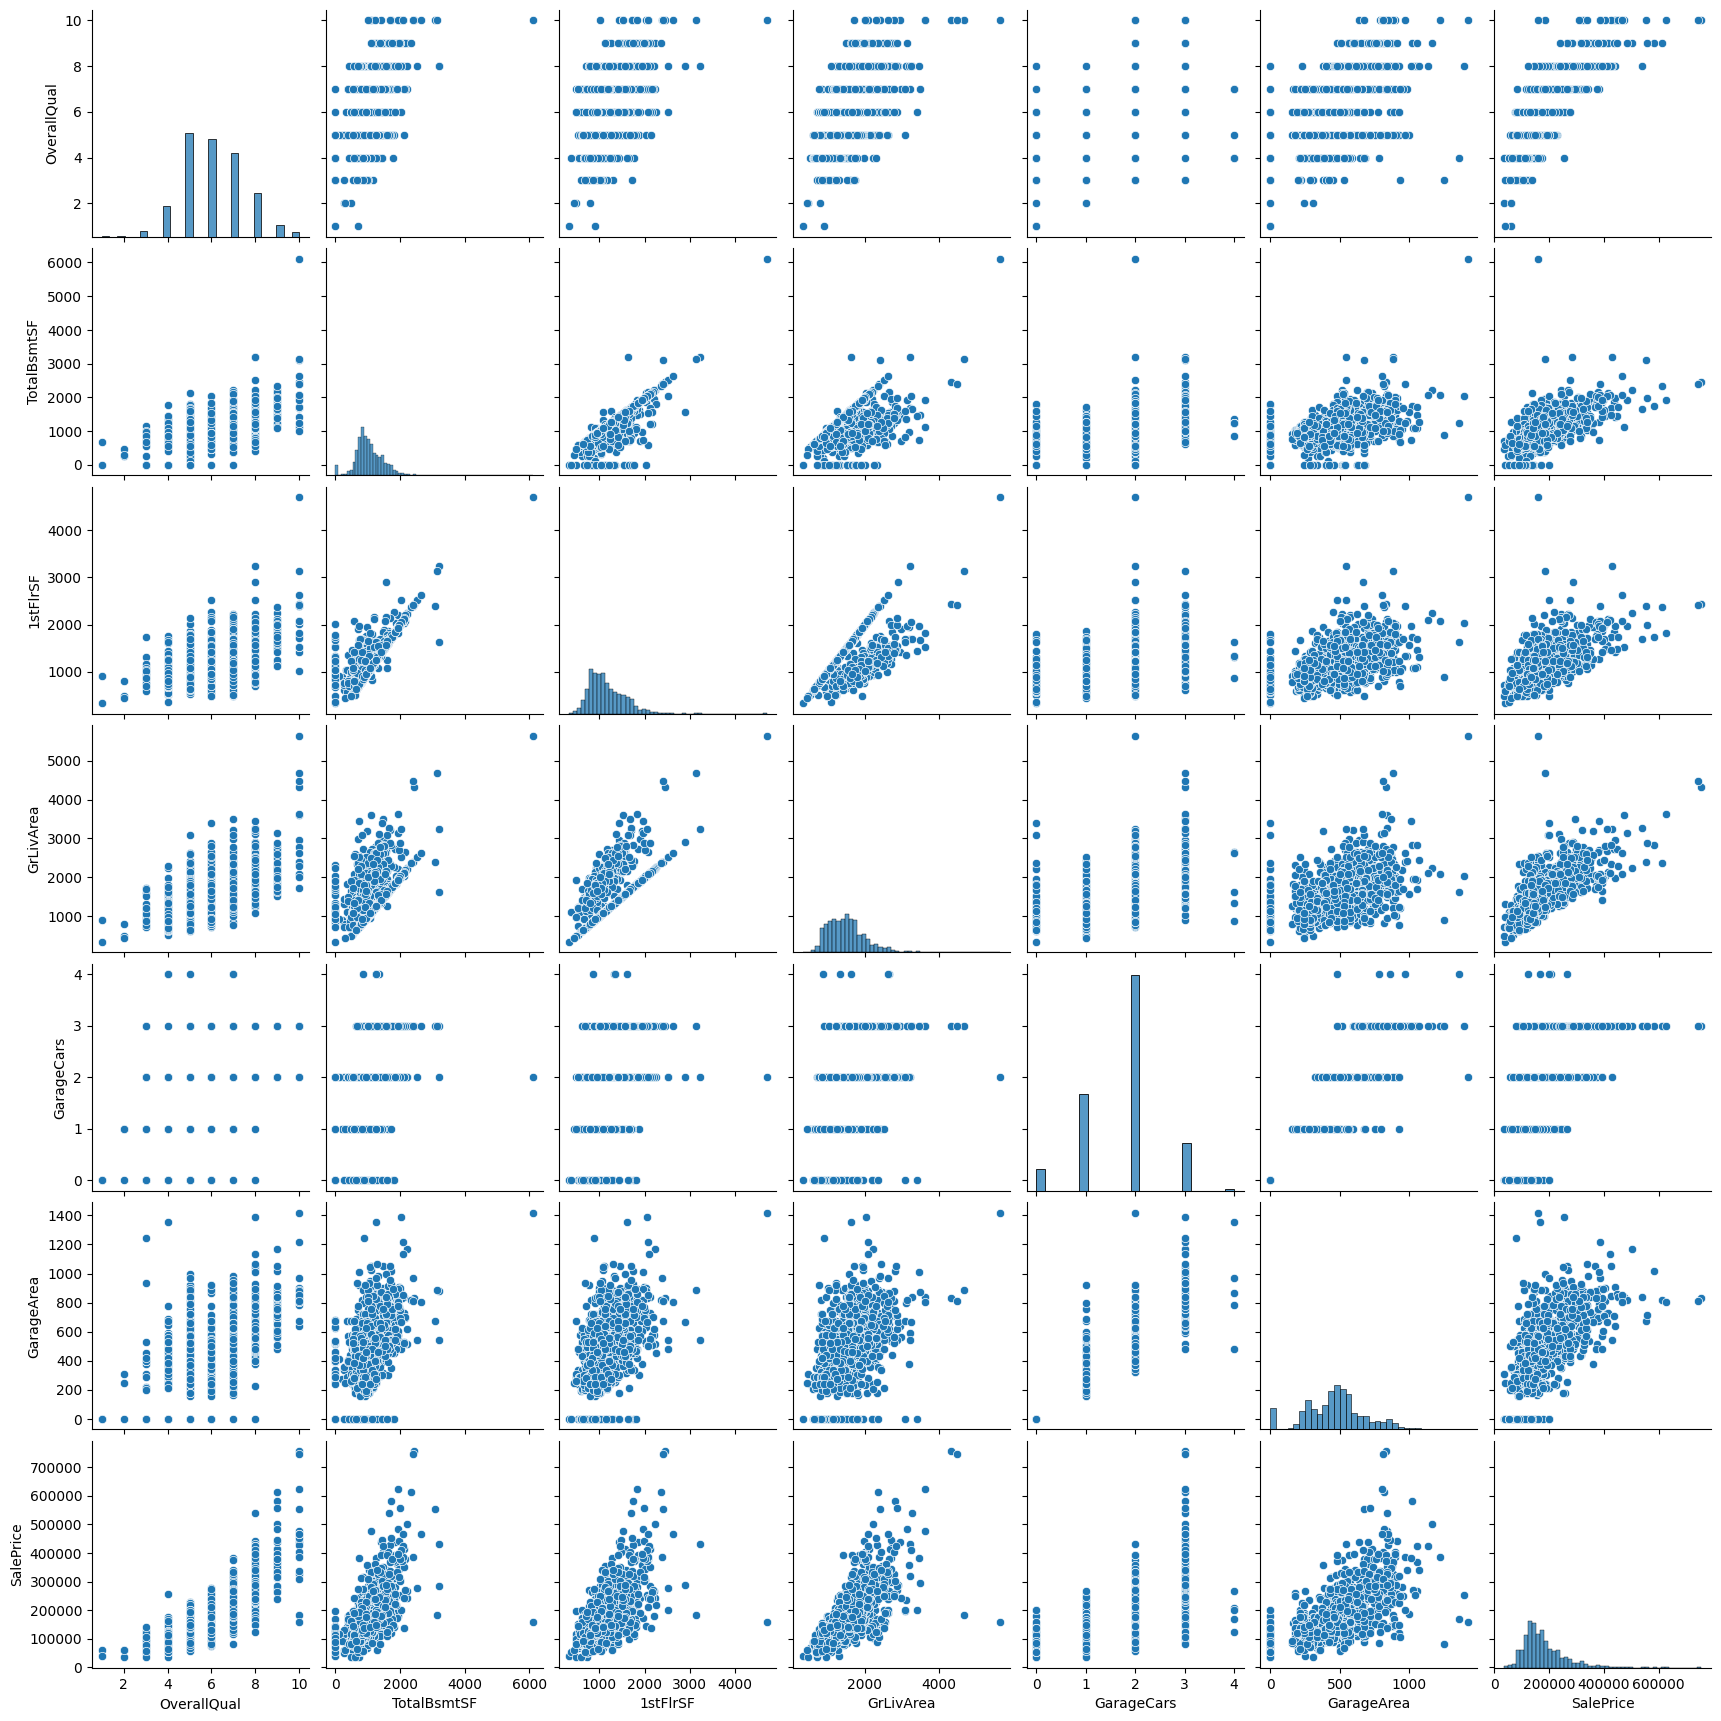

In [16]:
cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice']
sns_plot = sns.pairplot(df[cols])

In [20]:
correlation_matrix = df_encoded.corr().abs()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,0.009921,0.033226,0.028365,0.012609,0.012713,0.021998,0.051071,0.005024,...,0.020738,0.018998,0.038920,0.026133,0.007009,0.034852,0.009018,0.004865,0.015881,0.020738
MSSubClass,0.011156,1.000000,0.356718,0.139781,0.032628,0.059316,0.027850,0.040581,0.023573,0.069836,...,0.014005,0.045156,0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,0.051068
LotFrontage,0.009921,0.356718,1.000000,0.304522,0.234812,0.053281,0.116685,0.083348,0.178469,0.214367,...,0.051283,0.128995,0.023074,0.091864,0.021725,0.036570,0.018040,0.016250,0.074146,0.127293
LotArea,0.033226,0.139781,0.304522,1.000000,0.105806,0.005636,0.014228,0.013788,0.103321,0.214103,...,0.015040,0.020039,0.005722,0.002292,0.029126,0.013208,0.008966,0.010781,0.005711,0.022635
OverallQual,0.028365,0.032628,0.234812,0.105806,1.000000,0.091932,0.572323,0.550684,0.407252,0.239666,...,0.021172,0.327412,0.057962,0.225013,0.103535,0.041677,0.044950,0.025515,0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.034852,0.016241,0.036570,0.013208,0.041677,0.038888,0.045601,0.040294,0.011783,0.014874,...,0.003073,0.015827,0.002378,0.020457,0.014289,1.000000,0.004772,0.006177,0.112080,0.016038
SaleCondition_Alloca,0.009018,0.030002,0.018040,0.008966,0.044950,0.033444,0.010104,0.020727,0.013748,0.021369,...,0.005337,0.027489,0.004131,0.035530,0.024817,0.004772,1.000000,0.010729,0.194663,0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,0.010781,0.025515,0.023873,0.035785,0.048056,0.009535,0.000765,...,0.006909,0.035587,0.005348,0.028599,0.032128,0.006177,0.010729,1.000000,0.252006,0.036062
SaleCondition_Normal,0.015881,0.024359,0.074146,0.005711,0.143282,0.161642,0.158427,0.120577,0.081539,0.019560,...,0.027414,0.645698,0.097031,0.634322,0.582947,0.112080,0.194663,0.252006,1.000000,0.654323


In [21]:
selected_features = correlation_matrix[correlation_matrix["SalePrice"] > 0.6].index
selected_features

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

array([[<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >, <Axes: >]],
      dtype=object)

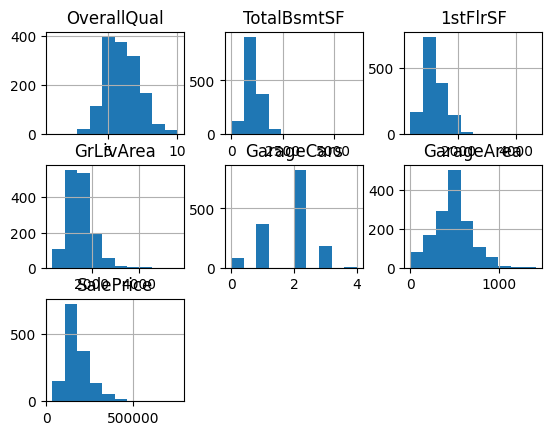

In [22]:
df_encoded = pd.get_dummies(df)
df_selected = df_encoded[selected_features]
df_selected.hist()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice']]
Y = df["SalePrice"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
print("MAE:", mae)

MAE: 530.5494748858449
